# Siamese Network RNN

In this little experiment, we are going to create an "Y model" based on MNIST model. The "Y model" has two inputs and one outputs. The Y-Network uses the same input twice, both on the left and right RNN branches. The network combines the results using concatenate layer.

### import libraries

In [1]:
import numpy as np
from keras.layers import Dense, Input, SimpleRNN
from keras.models import Model
from keras.datasets import mnist
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt

Using TensorFlow backend.


### load data

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

### compute the number of labels

In [3]:
num_labels = len(np.unique(y_train))

### reshape and normalize input images

In [4]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size])
x_test = np.reshape(x_test,[-1,image_size,image_size])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### visualize the data

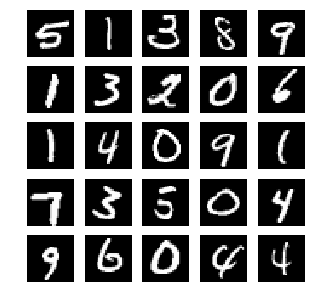

In [6]:
indexes = np.random.randint(0,x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

plt.show()
plt.close('all')

### network parameters

In [7]:
input_shape = (image_size,image_size)
units = 256
dropout = 0.4
epochs = 20

### left branch of the network

In [8]:
left_inputs = Input(shape=input_shape)
x = SimpleRNN(units=units,dropout=dropout)(left_inputs)

### right branch of the network

In [9]:
right_inputs = Input(shape=input_shape)
y = SimpleRNN(units=units,dropout=dropout)(right_inputs)

### merge left and right branches

In [10]:
z = concatenate([x,y])

### outputs

In [11]:
outputs = Dense(num_labels,activation='softmax')(z)

### build the model

In [12]:
model = Model([left_inputs,right_inputs],outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
simple_rnn_1 (SimpleRNN)        (None, 256)          72960       input_1[0][0]                    
__________________________________________________________________________________________________
simple_rnn_2 (SimpleRNN)        (None, 256)          72960       input_2[0][0]                    
____________________________________________________________________________________________

### compile and train the model

In [13]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit([x_train,x_train],y_train,validation_data=([x_test,x_test],y_test),
          epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 37s 615us/step - loss: 0.5557 - accuracy: 0.8296 - val_loss: 0.2196 - val_accuracy: 0.9320
Epoch 2/20
60000/60000 [==============================] - 46s 760us/step - loss: 0.2801 - accuracy: 0.9138 - val_loss: 0.1449 - val_accuracy: 0.9560
Epoch 3/20
60000/60000 [==============================] - 49s 824us/step - loss: 0.2180 - accuracy: 0.9323 - val_loss: 0.1253 - val_accuracy: 0.9627
Epoch 4/20
60000/60000 [==============================] - 47s 790us/step - loss: 0.1826 - accuracy: 0.9434 - val_loss: 0.0948 - val_accuracy: 0.9700
Epoch 5/20
60000/60000 [==============================] - 52s 869us/step - loss: 0.1616 - accuracy: 0.9492 - val_loss: 0.0902 - val_accuracy: 0.9714
Epoch 6/20
60000/60000 [==============================] - 55s 924us/step - loss: 0.1484 - accuracy: 0.9535 - val_loss: 0.0839 - val_accuracy: 0.9730
Epoch 7/20
60000/60000 [==============================] 

### evaluate the model

In [14]:
score = model.evaluate([x_test,x_test],y_test)
print("\nTest accuracy: %.1f%%" % (100*score[1]))

10000/10000 [==============================] - 2s 156us/step

Test accuracy: 98.6%


### Last comments

Over the course of the 20 epochs, the accuracy of the Y-Network is 98.6% which little higher than the simple RNN (https://github.com/AndryRafam/DEEP-LEARNING/blob/master/Artificial_Neural_Network/RNN.ipynb). However, this was at the cost of both higher complexity and more than double the number of parameters.